<a href="https://colab.research.google.com/github/wdwzyyg/Atom-Finder/blob/main/Data_into_hdf5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tables as tb
import scipy
from PIL import Image
from pylab import *
from tables import *
import PIL.Image ## solve import confilct problem here
import glob
import os 
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio
from collections import OrderedDict
import matplotlib.patches as patches
import h5py
from scipy.io import loadmat
def map01(mat):
    return (mat - mat.min())/(mat.max() - mat.min())
    

# First attempt

## Packaging of hierarchical structure

In [ ]:
class Parameter(IsDescription):
    index                  = StringCol(3)
    material_orientation   = StringCol(25)
    spacegroup             = StringCol(10)
    probe_current_pA       = Float32Col()
    peakintensity_e        = Float32Col()    
    pixelsize_pm           = Float32Col()
    contrast               = Float32Col()
    resolution_pm          = Float32Col()
    dwelltime_us           = Float32Col()
    poisson_dB             = Float32Col()
    randomdrift            = Float32Col()
    flybackerror           = Float32Col()

In [ ]:
# Open a file in "w"rite mode
fileh = tb.open_file("/content/drive/MyDrive/AtomfinderProject/Data_h5/Data.h5", mode = "w",  title="Atom-finder benchmark test")

# Get the HDF5 root group
root = fileh.root

# Create the groups
group1 = fileh.create_group('/', "STO_exp", "SrTiO3 experiment images")
group2 = fileh.create_group('/', "STO_simu", "SrTiO3 simulated images")
group3 = fileh.create_group('/', "WS2_exp",  "WS2 experiment images")
group4 = fileh.create_group('/', "WS2_simu",  "WS2 simulated images")
group5 = fileh.create_group('/', "Complex", "Complex images")


In [ ]:
pxsize = fileh.create_group(group1, "pxsize", "Different Pixel Size")
resolution = fileh.create_group(group1, "resolution", "Different Resolution")
dose = fileh.create_group(group1, "dose", "Different Dose")
contrast = fileh.create_group(group1,"contrast", "Different Contrast")

pxsizew = fileh.create_group(group3, "pxsize", "Different Pixel Size")
resolutionw = fileh.create_group(group3, "resolution", "Different Resolution")
dosew = fileh.create_group(group3, "dose", "Different Dose")
contrastw = fileh.create_group(group3,"contrast", "Different Contrast")

pxsizess = fileh.create_group(group2, "pxsize", "Different Pixel Size")
resolutionss = fileh.create_group(group2, "resolution", "Different Resolution")
contrastss = fileh.create_group(group2,"contrast", "Different Contrast")
flyss = fileh.create_group(group2, "flybackerror", "Different Fly Back Error")
randomss = fileh.create_group(group2, "randomdrift", "Different Random Drift")
poissonss = fileh.create_group(group2,"poissonnoise", "Different Poisson Noise")

pxsizews = fileh.create_group(group4, "pxsize", "Different Pixel Size")
resolutionws = fileh.create_group(group4, "resolution", "Different Resolution")
contrastws = fileh.create_group(group4,"contrast", "Different Contrast")
flyws = fileh.create_group(group4, "flybackerror", "Different Fly Back Error")
randomws = fileh.create_group(group4, "randomdrift", "Different Random Drift")
poissonws = fileh.create_group(group4,"poissonnoise", "Different Poisson Noise")

In [ ]:
print(fileh)

In [ ]:
# Now, create an array
rootpath = '/content/drive/MyDrive/AtomfinderProject/Data_h5/WS2-simu/DiffResolution/'
folderlist = os.listdir(rootpath)
i = 0
peak = []
contrastlist = []

for folder in folderlist:
    if folder[0]== 'S' or folder[0]== 'X' or folder[0]== 'N' or folder[0]== 'r':
      continue

    im = PIL.Image.open(rootpath+folder+'/'+folder+'.tif') 
    imgdata = np.asarray(im)
    
    try:
      raw = loadmat(rootpath+folder+'/'+folder+'_000.mat')['frame_noise']
    except:
      raw = np.load(rootpath+folder+'/'+folder+'.npy')
    peak.append(raw.max())
    value = np.round((raw.max() - raw.min())/raw.max(),3)
    contrastlist.append(value)
    
    x = np.load(rootpath+folder+'/'+'Peaks_x.npy')
    y = np.load(rootpath+folder+'/'+'Peaks_y.npy')

    fileh.create_array(fileh.root.WS2_simu.resolution, "img"+"{:02d}".format(i), imgdata, "img"+"{:02d}".format(i))
    fileh.create_array(fileh.root.WS2_simu.resolution, "raw"+"{:02d}".format(i), raw, "raw"+"{:02d}".format(i))
    fileh.create_array(fileh.root.WS2_simu.resolution, "coordx"+"{:02d}".format(i), x, "coordx"+"{:02d}".format(i))
    fileh.create_array(fileh.root.WS2_simu.resolution, "coordy"+"{:02d}".format(i), y, "coordy"+"{:02d}".format(i))
      
    i = i+1

number = i


In [ ]:
table = f.create_table(f.root.WS2_exp.pxsize, 'Metadata', Parameter, "Parameters of the image series")
#table.remove_rows(0,20)
particle = table.row
ll = [106.3,113.1,120.4,128.1,136,144.2,152.6,161.2,170,178.9,215.4,224.7,234.1,243.5,253,262.5,272,281.6,291.2,300.8]
#ll = np.arange(0, 0.32, .02)
for i in range(number):
    particle['index']  =" {:02d}".format(i)
    particle['material_orientation'] = 'WS2'
    #particle['spacegroup'] = 'Pm3m [221]'
    particle['spacegroup'] = 'P63/mmc [194]'
    particle['probe_current_pA'] = 18.9
    particle['peakintensity_e'] = peak[i]
    particle['pixelsize_pm'] = 15
    particle['contrast'] = contrastlist[i]
    particle['resolution_pm'] = ll[i]
    particle['dwelltime_us'] = 6
    particle['poisson_dB'] = 5
    particle['randomdrift'] = 0.04
    particle['flybackerror'] = 0.1
    # Insert a new particle record
    particle.append()
    # Flush the table buffers
    table.flush()


In [ ]:
 for x in table.iterrows():
   print(x["contrast"])

0.8349999785423279
0.9110000133514404
0.9480000138282776
0.9259999990463257
0.9390000104904175
0.800000011920929
0.7599999904632568
0.890999972820282
0.8650000095367432
0.5490000247955322
0.503000020980835
0.32600000500679016
0.28600001335144043
0.2720000147819519
0.4090000092983246
0.3790000081062317
0.35600000619888306
0.7170000076293945
0.45500001311302185
0.24199999868869781


In [ ]:
fileh.close()
#os.remove('/content/Data.h5')

In [ ]:
f = tb.open_file("/content/drive/MyDrive/AtomfinderProject/Data_h5/Data.h5", mode = "r+")
tablelist = []
for group in f.walk_groups("/"):
    for table in f.list_nodes(group, classname='Table'):
      tablelist.append(table)
      print(table)

/Summary (Table(0,)) 'Information of all images'
/WS2_simu/flybackerror/Metadata (Table(20,)) 'Parameters of the image series'
/WS2_simu/poissonnoise/Metadata (Table(20,)) 'Parameters of the image series'
/WS2_simu/pxsize/Metadata (Table(20,)) 'Parameters of the image series'
/WS2_simu/randomdrift/Metadata (Table(20,)) 'Parameters of the image series'
/WS2_simu/resolution/Metadata (Table(20,)) 'Parameters of the image series'
/WS2_exp/contrast/Metadata (Table(20,)) 'Parameters of the image series'
/WS2_exp/dose/Metadata (Table(20,)) 'Parameters of the image series'
/WS2_exp/pxsize/Metadata (Table(20,)) 'Parameters of the image series'
/WS2_exp/resolution/Metadata (Table(20,)) 'Parameters of the image series'
/STO_simu/flybackerror/Metadata (Table(20,)) 'Parameters of the image series'
/STO_simu/poissonnoise/Metadata (Table(20,)) 'Parameters of the image series'
/STO_simu/pxsize/Metadata (Table(20,)) 'Parameters of the image series'
/STO_simu/randomdrift/Metadata (Table(20,)) 'Parameter

In [ ]:
#table = f.create_table('/', 'Summary', Parameter_dir, "Information of all images")
t3 = tablelist[3]
#t1[8]
t3

/WS2_simu/pxsize/Metadata (Table(20,)) 'Parameters of the image series'
  description := {
  "contrast": Float32Col(shape=(), dflt=0.0, pos=0),
  "dwelltime_us": Float32Col(shape=(), dflt=0.0, pos=1),
  "flybackerror": Float32Col(shape=(), dflt=0.0, pos=2),
  "index": StringCol(itemsize=3, shape=(), dflt=b'', pos=3),
  "material_orientation": StringCol(itemsize=25, shape=(), dflt=b'', pos=4),
  "peakintensity_e": Float32Col(shape=(), dflt=0.0, pos=5),
  "pixelsize_pm": Float32Col(shape=(), dflt=0.0, pos=6),
  "poisson_dB": Float32Col(shape=(), dflt=0.0, pos=7),
  "probe_current_pA": Float32Col(shape=(), dflt=0.0, pos=8),
  "randomdrift": Float32Col(shape=(), dflt=0.0, pos=9),
  "resolution_pm": Float32Col(shape=(), dflt=0.0, pos=10),
  "spacegroup": StringCol(itemsize=10, shape=(), dflt=b'', pos=11)}
  byteorder := 'little'
  chunkshape := (885,)

In [ ]:
particle = table.row
tt = tablelist[7]
for i in range(20):
    particle['directory'] = '/STO_simu/poissonnoise/'
    particle['index']  = tt[i][3]
    particle['material_orientation'] = tt[i][4]
    #particle['spacegroup'] = 'Pm3m [221]'
    particle['spacegroup'] = tt[i][11]
    particle['probe_current_pA'] = tt[i][8]
    particle['peakintensity_e'] = tt[i][5]
    particle['pixelsize_pm'] = tt[i][6]
    particle['contrast'] = tt[i][0]
    particle['resolution_pm'] = tt[i][10]
    particle['dwelltime_us'] = tt[i][1]
    particle['poisson_dB'] = tt[i][7]
    particle['randomdrift'] = tt[i][9]
    particle['flybackerror'] = tt[i][2]
    # Insert a new particle record
    particle.append()
    # Flush the table buffers
    table.flush()

## Walk through the tree structure along a branch

In [ ]:
f = tb.open_file("/content/drive/MyDrive/AtomfinderProject/Data_h5/Data.h5", mode = "r")

In [ ]:
for leaf in f.root.WS2_simu.resolution._f_walknodes('Leaf'):
    print(leaf)

['contrast', 'dwelltime_us', 'flybackerror', 'index', 'material_orientation', 'peakintensity_e', 'pixelsize_pm', 'poisson_dB', 'probe_current_pA', 'randomdrift', 'resolution_pm', 'spacegroup']
b' 00' 106.30000305175781
b' 01' 113.0999984741211
b' 02' 120.4000015258789
b' 03' 128.10000610351562
b' 04' 136.0
b' 05' 144.1999969482422
b' 06' 152.60000610351562
b' 07' 161.1999969482422
b' 08' 170.0
b' 09' 178.89999389648438
b' 10' 215.39999389648438
b' 11' 224.6999969482422
b' 12' 234.10000610351562
b' 13' 243.5
b' 14' 253.0
b' 15' 262.5
b' 16' 272.0
b' 17' 281.6000061035156
b' 18' 291.20001220703125
b' 19' 300.79998779296875


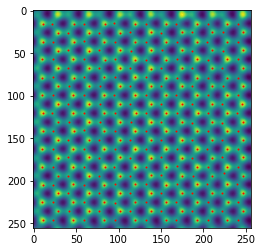

In [ ]:
info = f.root.WS2_simu.resolution.Metadata
print(info.colnames)

for x in info.iterrows():
  print(x['index'], x["resolution_pm"])

goal = f.root.WS2_simu.resolution.img00
goalx = f.root.WS2_simu.resolution.coordx00
goaly = f.root.WS2_simu.resolution.coordy00

plt.imshow(goal)
plt.scatter(goalx, goaly,s = 1, c = 'r')

In [ ]:
f.close()

## Pick data by filtering search

In [ ]:
dirlist = []
indexlist = []
for x in f.root.Summary.iterrows():
   if x["resolution_pm"] > 150:
     dirlist.append(x["directory"])
     indexlist.append(x["index"])
print(dirlist[0], indexlist[0])

b'/WS2_simu/flybackerror/' b' 06'


In [ ]:
a = f.get_node(str(dirlist[0])[2:-1])
a.

In [ ]:
str(dirlist[8])[2:]

"/WS2_simu/flybackerror/'"

# Flat structure

## pre

In [11]:
# use for remove files
path = '/content/drive/MyDrive/AtomfinderProject/Data/WS2-simu/DiffRandomdrift/'
folderlist = os.listdir(path)
for folder in folderlist:
    if folder[0]== 'S' or folder[0]== 'X' or folder[0]== 'N' or folder[0]== 'r':
      continue
    for file in os.listdir(path + folder + '/'):
      if file[0] == 'W':
        os.remove(path + folder+ '/'+ file)

In [12]:
# use for rename folders
path = '/content/drive/MyDrive/AtomfinderProject/Data/WS2-simu/DiffResolution/'
folderlist = os.listdir(path)
for folder in folderlist:
    if folder[0]== 'S' or folder[0]== 'X' or folder[0]== 'N' or folder[0]== 'r':
      continue
    foldernew = folder.replace("d", ".")
    #os.rename(path + folder, path + foldernew)
    os.rename(path + folder, path + folder[:-2])

## packaging

In [15]:
 f = h5py.File('/content/drive/MyDrive/AtomfinderProject/Data/BenchmarkDataset.hdf5', 'w')
 f.close

<bound method File.close of <HDF5 file "BenchmarkDataset.hdf5" (mode r+)>>

In [34]:
h5file = h5py.File('/content/drive/MyDrive/AtomfinderProject/Data/BenchmarkDataset.hdf5', 'r+')

In [31]:
number = 0

In [39]:
path = '/content/drive/MyDrive/AtomfinderProject/Data/WS2-simu/DiffResolution/'############
folderlist = os.listdir(path)

i = number
for folder in folderlist:
    if folder[0]== 'S' or folder[0]== 'X' or folder[0]== 'N' or folder[0]== 'r':
      continue
    for file in os.listdir(path + folder + '/'):
      filename,surfix = os.path.splitext(file)
      if surfix == '.tif':
        im = PIL.Image.open(path+folder+'/'+file)
        imgdata = np.asarray(im)
      if surfix == '.npy' and filename[0] != 'P':
        raw = np.load(path+folder+'/'+file)
    peak = raw.max()
    contrast = np.round((raw.max() - raw.min())/raw.max(),3)
    x = np.load(path+folder+'/'+'Peaks_x.npy')
    y = np.load(path+folder+'/'+'Peaks_y.npy')

    grp = h5file.create_group('{:03d}'.format(i))
    grp.create_dataset('img', data=imgdata)
    grp.create_dataset('raw', data=raw)
    grp.create_dataset('coordx', data=x)
    grp.create_dataset('coordy', data=y)


    grp.attrs.create('Material_orientation','WS2[0001]')
    grp.attrs.create('Type','simulated')
    grp.attrs.create('Spacegroup','P63/mmc[194]')
    grp.attrs.create('probe_current_pA',18.9)
    grp.attrs.create('peakintensity_e-',peak)
    grp.attrs.create('contrast',contrast)    
    
    ####### metadata usually to be changed for different folders 
    grp.attrs.create('pixelsize_pm',15)
    grp.attrs.create('Atoms/px',15/1.842)
    grp.attrs.create('resolution_pm',float(folder))
    grp.attrs.create('dose_e-/\u212b\u00b2',7087500/15/15)
    grp.attrs.create('poisson_dB',77.7)
    grp.attrs.create('randomdrift',0.04)
    grp.attrs.create('flybackerror',0.1)

    i = i + 1


number = i
print('Number of images saved: ', number) 

Number of images saved:  87


In [40]:
h5file.close

<bound method File.close of <HDF5 file "BenchmarkDataset.hdf5" (mode r+)>>

In [50]:
# del f['subgroup']

## Walk through the h5 file

In [49]:
f = h5py.File('/content/drive/MyDrive/AtomfinderProject/Data/BenchmarkDataset.hdf5', 'r+')

**See the two layer structure of the h5 file**





In [73]:
print(f.keys())
print(f['001'].keys())
print(f['001'].attrs.keys())

<KeysViewHDF5 ['000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086']>
<KeysViewHDF5 ['coordx', 'coordy', 'img', 'raw']>
<KeysViewHDF5 ['Atoms/px', 'Material_orientation', 'Spacegroup', 'Type', 'contrast', 'dose_e-Å²', 'flybackerror', 'peakintensity_e-', 'pixelsize_pm', 'poisson_dB', 'probe_current_pA', 'randomdrift', 'resolution_pm']>


**Read metadata of an image and reach the target**

8.143 



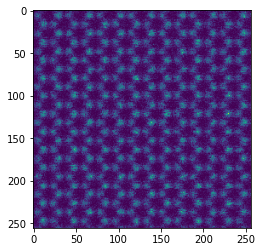

In [80]:
a = f['001']
print(a.attrs.get('Atoms/px'), '\n')

b = f['/000/img'] # or f['000']['img']
plt.imshow(b)

**Querying for specific type of images**

In [78]:
for group in f.keys():
  if f[group].attrs.get('Atoms/px') > 10:
    print(group)

018
019
020
021
022
023
024
026
027
031


### Functions in one class

In [ ]:
import os
import sys
from os.path import exists
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio
from PIL import Image, ImageDraw
from skimage.filters import sobel
from skimage.measure import regionprops
from skimage.morphology import opening, watershed, disk, erosion

import h5py
import glob

%cd /content/AtomSegNet
#from UI_files.Atom_Seg_Ui import Ui_MainWindow
from utils.utils import GetIndexRangeOfBlk, load_model, PIL2Pixmap, map01

In [81]:
class Code_Main():
  def __init__(self, parent=None):
    super(Code_Main, self).__init__()

    self.ori_image = None
    self.ori_content = None  # original image, PIL format
    self.output_image = None  # output image of model, PIL format
    self.ori_markers = None  # for saving usage, it's a rgb image of original, and with detection result on it
    self.out_markers = None  # for saving usage, it's a rgb image of result after denoising, and with detection result on it
    self.model_output_content = None  # 2d array of model output
    self.result = None
    self.denoised_image = None
    self.props = None

    self.__curdir = os.getcwd()  # current directory  
    self.set_iter = 1            # set Iteration 1-5
    self.se_num = 0              # se_num for Denoise() level: 0-20
    #self.savepath = None  # set save path

    self.imarray_original = None
    self.__model_dir = "model_weights"
    self.__models = {
        'circularMask': os.path.join(self.__model_dir, 'circularMask.pth'),
        'circularMask_mse_beta': os.path.join(self.__model_dir, 'circularMask_mse_beta.pth'),
        'circularMask_chi10_beta': os.path.join(self.__model_dir, 'circularMask_chi10_beta.pth'),
        'cicularMask_chi100_beta': os.path.join(self.__model_dir, 'circularMask_chi100_beta.pth'),
        'guassianMask': os.path.join(self.__model_dir, 'guassianMask.pth'),
        'gaussianMask+': os.path.join(self.__model_dir, 'gaussianMask+.pth'),
        'denoise': os.path.join(self.__model_dir, 'denoise.pth'),
        'denoise&bgremoval': os.path.join(self.__model_dir, 'denoise&bgremoval.pth'),
        'denoise&bgremoval&superres': os.path.join(self.__model_dir, 'denoise&bgremoval&superres.pth'),
        'denoise&airysuperrez_beta': os.path.join(self.__model_dir, 'denoise&airysuperrez_beta.pth')
        }

    """from torch.cuda import is_available
    self.use_cuda.setChecked(is_available())
    self.use_cuda.setDisabled(not is_available())"""

    self.imagePath_content = None

  def BrowseFolder(self,path):
        
        self.imagePath_content = self.imagePath_content if not path else path

        if self.imagePath_content:
            file_name = os.path.basename(self.imagePath_content)
            _, suffix = os.path.splitext(file_name)
            # file_name = self.imagePath_content.split('/')[-1]
            # suffix = '.' + file_name.split('.')[-1]
            if suffix == '.ser':
                from file_readers.ser_lib.serReader import serReader
                ser_data = serReader(self.imagePath_content)
                ser_array = np.array(ser_data['imageData'], dtype='float64')
                self.imarray_original = ser_array
                ser_array = (map01(ser_array) * 255).astype('uint8')
                self.ori_image = Image.fromarray(ser_array, 'L')
            elif suffix == '.dm3':
                from file_readers import dm3_lib as dm3
                data = dm3.DM3(self.imagePath_content).imagedata
                self.imarray_original = np.array(data)
                data = np.array(data, dtype='float64')
                data = (map01(data) * 255).astype('uint8')
                self.ori_image = Image.fromarray(data, mode='L')
            elif suffix == '.tif':
                im = Image.open(self.imagePath_content).convert('L')
                self.imarray_original = np.array(im, dtype='float64')
                self.ori_image = Image.fromarray((map01(self.imarray_original) * 255).astype('uint8'), mode='L')
            else:
                self.ori_image = Image.open(self.imagePath_content).convert('L')
                self.imarray_original = np.array(self.ori_image)

            self.width, self.height = self.ori_image.size
            self.ori_content = self.ori_image

  def __load_model(self):
        #if not self.ori_image:
            #raise Exception("No image is selected.")

        # cuda=1 if use cuda
        self.cuda = 0
        # set 'Down sample by 2' 'Up sample by 2' or by 3, 4
        self.change_size = 'Do Nothing' 
        # split = 1 will split image larger than 1024 automatically
        self.split = 0

        model_path = os.path.join(self.__curdir, self.__models[self.model_name])

        if self.change_size == 'Down sample by 2':
            self.width, self.height = self.ori_image.size
            self.ori_content = self.ori_image.resize((self.width // 2, self.height // 2), Image.BILINEAR)
        elif self.change_size == 'Up sample by 2':
            self.width, self.height = self.ori_image.size
            self.ori_content = self.ori_image.resize((self.width * 2, self.height * 2), Image.BICUBIC)
        elif self.change_size == 'Down sample by 3':
            self.width, self.height = self.ori_image.size
            self.ori_content = self.ori_image.resize((self.width // 3, self.height // 3), Image.BILINEAR)
        elif self.change_size == 'Up sample by 3':
            self.width, self.height = self.ori_image.size
            self.ori_content = self.ori_image.resize((self.width * 3, self.height * 3), Image.BICUBIC)
        elif self.change_size == 'Down sample by 4':
            self.width, self.height = self.ori_image.size
            self.ori_content = self.ori_image.resize((self.width // 4, self.height // 4),
                                                     Image.BILINEAR)
        elif self.change_size == 'Up sample by 4':
            self.width, self.height = self.ori_image.size
            self.ori_content = self.ori_image.resize((self.width * 4, self.height * 4),
                                                     Image.BICUBIC)
        else:
            self.ori_content = self.ori_image


        self.width, self.height = self.ori_content.size

        if self.split == 1:

            if self.height > 1024 and self.height < 2000:
                blk_row = 2
            else:
                if self.height > 2000:
                    blk_row = 4
                else:
                    blk_row = 1

            if self.width > 1024 and self.width < 2000:
                blk_col = 2
            else:
                if self.width > 2000:
                    blk_col = 4
                else:
                    blk_col = 1
        else:
            blk_col = 1
            blk_row = 1

        self.result = np.zeros((self.height, self.width)) - 100

        for r in range(0, blk_row):
            for c in range(0, blk_col):
                inner_blk, outer_blk = GetIndexRangeOfBlk(self.height, self.width, blk_row, blk_col, r, c,
                                                          over_lap=int(self.width * 0.01))
                temp_image = self.ori_content.crop((outer_blk[0], outer_blk[1], outer_blk[2], outer_blk[3]))
                temp_result = load_model(model_path, temp_image, self.cuda, self.set_iter)
                #                temp_result = map01(temp_result)
                self.result[outer_blk[1]: outer_blk[3], outer_blk[0]: outer_blk[2]] = np.maximum(temp_result,
                                                                                                 self.result[
                                                                                                 outer_blk[1]:outer_blk[
                                                                                                     3], outer_blk[0]:
                                                                                                         outer_blk[2]])
        self.result[self.result < 0] = 0
        self.model_output_content = map01(self.result)
        self.model_output_content = (self.model_output_content * 255 / np.max(self.model_output_content)).astype(
            'uint8')
        self.output_image = Image.fromarray((self.model_output_content), mode='L')
       
        del temp_image
        del temp_result
      
  def LoadModel(self, modelPath):
    #   'circularMask_mse_beta'  
    #   'circularMask_chi10_beta'
    #   'cicularMask_chi100_beta'
    #   'guassianMask'
    #   'gaussianMask+'
    #   'denoise'
    #   'denoise&bgremoval'
    #   'denoise&bgremoval&superres'
    #   'denoise&airysuperrez_beta'
        self.model_name = modelPath
        self.__load_model()
        self.Denoise()

  def Denoise(self):

        self.denoise_method = 'Opening'  # 'Erosion'

        radius = self.se_num
        """changes should be done on the kernel generation"""
        kernel = disk(radius)

        if self.denoise_method == 'Opening':
            self.denoised_image = opening(self.model_output_content, kernel)
        else:
            self.denoised_image = erosion(self.model_output_content, kernel)

        temp_image = Image.fromarray(self.denoised_image, mode='L')

        del temp_image

  def CircleDetect(self):

        self.set_thre = 0  # 1 if set threshold
        self.thre = 100    # default threshold
        #if not self.imagePath_content:
            #raise Exception("No image is selected.")

        elevation_map = sobel(self.denoised_image)

        from scipy import ndimage as ndi
        markers = np.zeros_like(self.denoised_image)
        if self.set_thre and self.thre:
            max_thre = int(self.thre) * 2.55
        else:
            max_thre = 100

        min_thre = 30
        markers[self.denoised_image < min_thre] = 1
        markers[self.denoised_image > max_thre] = 2

        seg_1 = watershed(elevation_map, markers)

        filled_regions = ndi.binary_fill_holes(seg_1 - 1)

        label_objects, nb_labels = ndi.label(filled_regions)

        self.props = regionprops(label_objects)

        self.out_markers = Image.fromarray(np.dstack((self.denoised_image, self.denoised_image, self.denoised_image)),
                                           mode='RGB')

        ori_array = np.array(self.ori_content)
        self.ori_markers = Image.fromarray(np.dstack((ori_array, ori_array, ori_array)), mode='RGB')

        del elevation_map
        del markers, seg_1, filled_regions, label_objects, nb_labels

        draw_out = ImageDraw.Draw(self.out_markers)
        draw_ori = ImageDraw.Draw(self.ori_markers)

        for p in self.props:
            c_y, c_x = p.centroid
            draw_out.ellipse([min([max([c_x - 2, 0]), self.width]), min([max([c_y - 2, 0]), self.height]),
                              min([max([c_x + 2, 0]), self.width]), min([max([c_y + 2, 0]), self.height])],
                             fill='red', outline='red')
            draw_ori.ellipse([min([max([c_x - 2, 0]), self.width]), min([max([c_y - 2, 0]), self.height]),
                              min([max([c_x + 2, 0]), self.width]), min([max([c_y + 2, 0]), self.height])],
                             fill='red', outline='red')
            
  def GetSavePath(self): 
  # return savepath+001033.010001/001033.010001
        file_name = os.path.basename(self.imagePath_content)  #001033.010001.h5
        _, suffix = os.path.splitext(file_name)
        if suffix in ['.ser', '.dm3', '.tif']:
            name_no_suffix = file_name.replace(suffix, '')
            suffix = '.png'
        else:
            name_no_suffix = file_name.replace(suffix, '')   #001033.010001
            suffix = '.png'

        if not self.change_size == 'Do Nothing':
            name_no_suffix = name_no_suffix + '_' + self.change_size.currentText()
        has_content = True

       
        path = self.savepath
        save_path = os.path.join(path, name_no_suffix)

        if has_content:
            if not exists(save_path):
                os.mkdir(save_path)
            temp_path = os.path.join(save_path, name_no_suffix)
        else:
            temp_path = None

        return temp_path, suffix   

  def Save(self, opt):

        _path, suffix = self.GetSavePath()
        # _path = savepath+001033.010001/001033.010001
        if _path is None:
            return

        if not _path:
            return

        if opt == 'Atom positions':
          pos_y = []
          pos_x = []
          for p in self.props:
            c_y, c_x = p.centroid
            pos_y.append(c_y)
            pos_x.append(c_x)
          np.save(_path + '_pos_y.npy', np.asarray(pos_y))
          np.save(_path + '_pos_x.npy', np.asarray(pos_x)) 

        if opt == 'Save ALL':
          new_save_name = _path + '_output_' + self.model_name + '.mat'
          scio.savemat(new_save_name, {'result': self.result})
          new_save_name = _path + '_ori_' + self.model_name + '.mat'
          scio.savemat(new_save_name, {'origin': self.imarray_original})

          new_save_name = _path + suffix
          self.ori_content.save(new_save_name)
          new_save_name = _path + '_output_' + self.model_name + suffix
          self.output_image.save(new_save_name)
          new_save_name = _path + '_origin_' + self.model_name + suffix
          self.ori_markers.save(new_save_name)
          new_save_name = _path + '_four_panel_' + self.model_name + suffix
          im_save = Image.new('RGB', ((self.width + 1) * 2, (self.height + 1) * 2))
          im_save.paste(self.ori_content, (0, 0))
          im_save.paste(self.output_image, (self.width + 2, 0))
          im_save.paste(self.ori_markers, (0, self.height + 2))
          im_save.paste(self.out_markers, (self.width + 2, self.height + 2))
          im_save.save(new_save_name)
          del im_save

          new_save_name = _path + '_pos_' + self.model_name + '.txt'
          file = open(new_save_name, 'w')
          for p in self.props:
            c_y, c_x = p.centroid
            min_row, min_col, max_row, max_col = p.bbox
            c_y_int = int(min(max(round(c_y), 0), self.height))
            c_x_int = int(min(max(round(c_x), 0), self.width))
            locations = [str(i) for i in
                          (c_y, c_x, min_row, min_col, max_row, max_col, self.result[c_y_int, c_x_int])]
            file.write(",".join(locations))
            file.write("\n")
          file.close()           
 
          pos_y = []
          pos_x = []
          for p in self.props:
            c_y, c_x = p.centroid
            pos_y.append(c_y)
            pos_x.append(c_x)
          np.save(_path + '_pos_y.npy', np.asarray(pos_y))
          np.save(_path + '_pos_x.npy', np.asarray(pos_x)) 

  def drawPoint(self, event):
        self.pos = event.pos()
        self.update()

  def release(self):
        self.model_output.clear()
        self.se_num = 0
        self.preprocess.clear()
        self.detect_result.clear()
        self.ori.clear()
        del self.props
        del self.output_image
        del self.ori_markers
        del self.out_markers
        return
